## Observations and Insights 

In [ ]:
#Observations:
#1. There is a strong positive correlation, more than .75, between mouse weight and average tumor volume across timepoints.
#2. Capomulin and Ramicane had the greatest numbers of tests done, while Propriva had the least done.
#3. I was unable to find any potential outlier tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress
import random
# Study data files
mousemetadatapath = "mouse.csv"
studyresultspath = "study.csv"

# Read the mouse data and the study results
mousemetadata = pd.read_csv(mousemetadatapath)
studyresults = pd.read_csv(studyresultspath)

# Combine the data into a single dataset
merge_df=pd.merge(mousemetadata,studyresults,on="Mouse ID",how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#Find how many mice there are.
merge_df["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_df=merge_df.groupby(["Mouse ID","Timepoint"])
counted_df=find_df.count()
onlymults=counted_df.loc[counted_df["Drug Regimen"]>1,:]
onlymults

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 



In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newmerge_df=merge_df[merge_df["Mouse ID"]!="g989"]
newmerge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
newmerge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_df=newmerge_df.groupby("Drug Regimen")

means_df=pd.DataFrame(group_df["Tumor Volume (mm3)"].mean())
medians_df=pd.DataFrame(group_df["Tumor Volume (mm3)"].median())

summary_df=pd.merge(means_df,medians_df,on="Drug Regimen")
name_df=summary_df.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volumes (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volumes (mm3)"})

vars_df=pd.DataFrame(group_df["Tumor Volume (mm3)"].var())
stds_df=pd.DataFrame(group_df["Tumor Volume (mm3)"].std())

summary2_df=pd.merge(vars_df,stds_df,on="Drug Regimen")
name2_df=summary2_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Variances (mm6)","Tumor Volume (mm3)_y":"Tumor Volume Standard Deviations (mm3)"})

sems_df=pd.DataFrame(group_df["Tumor Volume (mm3)"].sem())
name3_df=sems_df.rename(columns={"Tumor Volume (mm3)":"Standard Errors of the Tumor Volume Means (mm3)"})

summary3_df=pd.merge(name_df,name2_df,on="Drug Regimen")
summary4_df=pd.merge(summary3_df,name3_df,on="Drug Regimen")
summary4_df

,Mean Tumor Volumes (mm3),Median Tumor Volumes (mm3),Tumor Volume Variances (mm6),Tumor Volume Standard Deviations (mm3),Standard Errors of the Tumor Volume Means (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
bar_df=newmerge_df.groupby('Drug Regimen').agg(["mean","median","var","std","sem","count"])["Tumor Volume (mm3)"]
bar_df

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

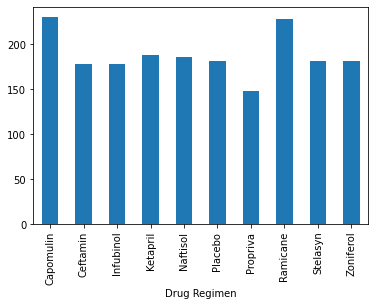

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ax=bar_df["count"].plot.bar()

Text(0.5, 1.0, 'Measurements Made per Drug Regimen')

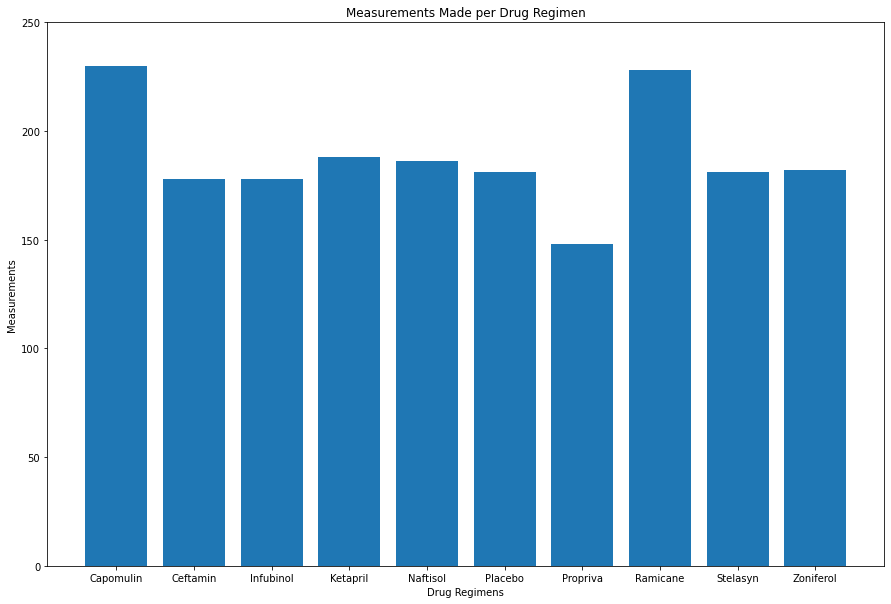

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
barheight=newmerge_df.groupby("Drug Regimen").count()["Mouse ID"]
ax = plt.subplots(figsize=(15,10))
plt.bar(regimens,barheight)
plt.xlabel("Drug Regimens")
plt.ylabel("Measurements")
plt.ylim(0,250)
plt.title("Measurements Made per Drug Regimen")

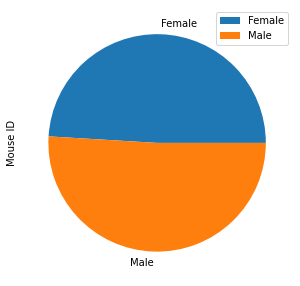

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mergesex_df=newmerge_df.groupby("Sex").count()
mergesex_df.plot.pie(y="Mouse ID",figsize=(5, 5))

<ipython-input-100-f94ca0e942bb>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,labels=labels)


Text(0.5, 1.0, 'Sex Composition of Test Mice')

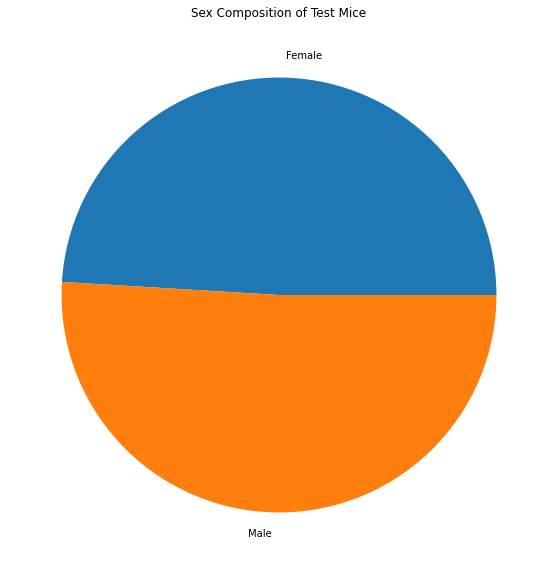

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
sizes=[newmerge_df.groupby("Sex").count()["Mouse ID"]]
ax = plt.subplots(figsize=(15,10))
plt.pie(sizes,labels=labels)
plt.title("Sex Composition of Test Mice")
plt.

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
time45_df=newmerge_df.loc[newmerge_df["Timepoint"]==45,:]
drugs4_df=time45_df.loc[(time45_df["Drug Regimen"]=="Capomulin")|(time45_df["Drug Regimen"]=="Ramicane")|(time45_df["Drug Regimen"]=="Infubinol")|(time45_df["Drug Regimen"]=="Ceftamin")]
drugs4_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting later)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
quants_df=pd.DataFrame(drugs4_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(q=[.25,.50,.75]))
rawcap=drugs4_df.loc[drugs4_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
rawram=drugs4_df.loc[drugs4_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
rawinf=drugs4_df.loc[drugs4_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
rawcef=drugs4_df.loc[drugs4_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
iqr1=quants_df.iat[2,0]-quants_df.iat[0,0]
iqr2=quants_df.iat[5,0]-quants_df.iat[3,0]
iqr3=quants_df.iat[8,0]-quants_df.iat[6,0]
iqr4=quants_df.iat[11,0]-quants_df.iat[9,0]
bound1=quants_df.iat[0,0]-(1.5*iqr1)
bound2=quants_df.iat[2,0]+(1.5*iqr1)
bound3=quants_df.iat[3,0]-(1.5*iqr2)
bound4=quants_df.iat[5,0]+(1.5*iqr2)
bound5=quants_df.iat[6,0]-(1.5*iqr3)
bound6=quants_df.iat[8,0]+(1.5*iqr3)
bound7=quants_df.iat[9,0]-(1.5*iqr4)
bound8=quants_df.iat[11,0]+(1.5*iqr4)
if min(rawcap)<bound1 or max(rawcap)>bound2:
    answer1="Yes"
else:
    answer1="No"
if min(rawcef)<bound3 or max(rawcef)>bound4:
    answer2="Yes"
else:
    answer2="No"
if min(rawinf)<bound5 or max(rawinf)>bound6:
    answer3="Yes"
else:
    answer3="No"
if min(rawram)<bound7 or max(rawram)>bound8:
    answer4="Yes"
else:
    answer4="No"
quants_df["IQRs (mm3)"]=[iqr1,"","",iqr2,"","",iqr3,"","",iqr4,"",""]
quants_df["Outliers?"]=[answer1,"","",answer2,"","",answer3,"","",answer4,"",""]
quants_df
    # add subse

    # Determine outliers using upper and lower bounds

Tumor Volume (mm3) IQRs (mm3) Outliers?
Drug Regimen                                              
Capomulin    0.25           32.377357    7.78186        No
             0.50           37.311846                     
             0.75           40.159220                     
Ceftamin     0.25           61.433892    6.09359        No
             0.50           64.299830                     
             0.75           67.527482                     
Infubinol    0.25           62.754451    4.93112        No
             0.50           66.083066                     
             0.75           67.685569                     
Ramicane     0.25           30.981175    7.52713        No
             0.50           34.848627                     
             0.75           38.508305

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volumes (mm3)')

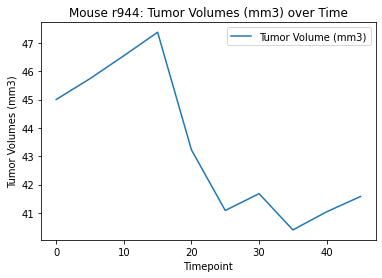

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capsonly_df=newmerge_df.loc[newmerge_df["Drug Regimen"]=="Capomulin"]
r944_df=capsonly_df.loc[capsonly_df["Mouse ID"]=="r944"]
r944_df.plot("Timepoint","Tumor Volume (mm3)",kind="line")
plt.title("Mouse r944: Tumor Volumes (mm3) over Time")
plt.ylabel("Tumor Volumes (mm3)")

Text(3, 4, 'y=0.9544396890241045x+21.552160532685015')

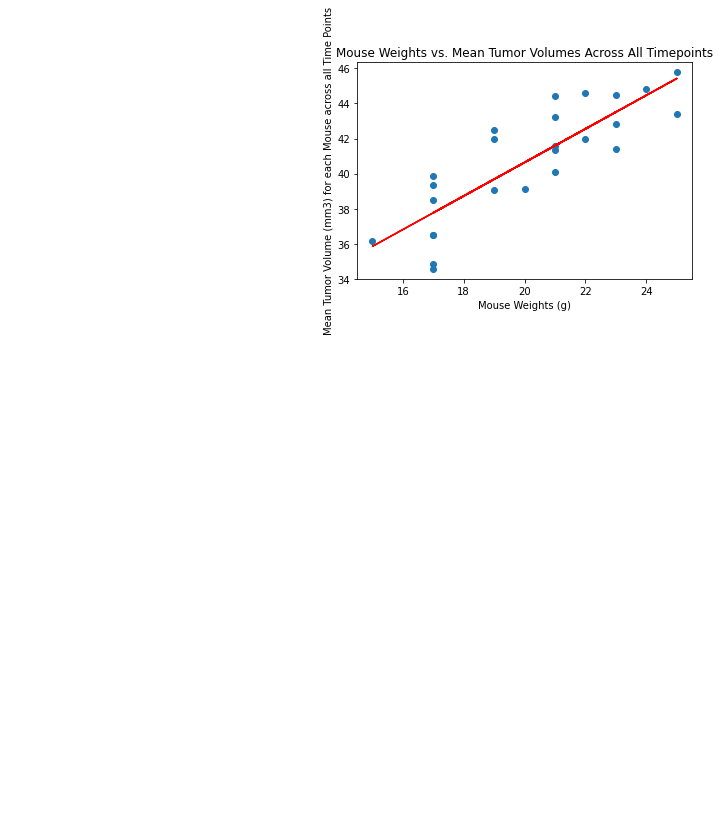

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
justcap_df=newmerge_df.loc[newmerge_df["Drug Regimen"]=="Capomulin"]
agh_df=pd.DataFrame(justcap_df.groupby("Mouse ID").mean())
weights=agh_df.loc[:,"Weight (g)"]
meanvols=agh_df.loc[:,"Tumor Volume (mm3)"]
plt.scatter(weights,meanvols)
plt.xlabel("Mouse Weights (g)")
plt.ylabel("Mean Tumor Volume (mm3) for each Mouse across all Time Points",fontsize=10)
plt.title("Mouse Weights vs. Mean Tumor Volumes Across All Timepoints")
corr=st.pearsonr(weights,meanvols)
(slope,intercept,rvalue,pvalue,stderr)=linregress(weights,meanvols,)
regresses=weights*slope+intercept
lineeq="y="+str(slope)+"x+"+str(intercept)
plt.plot(weights,regresses,"r-")
plt.annotate(lineeq,(3,4),fontsize=1)

## Correlation and Regression

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"r={corr[0]}, linear regression model: y={slope}*x+{intercept}")

r=0.8419363424694717, linear regression model: y=0.9544396890241045*x+21.552160532685015
